**ABALONE AGE PREDICTION**

**Building a Regression**




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.LOADING OF DATASET

In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Dataset/abalone.csv')
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


3.PERFOMING DATA VISUALIZATION

(i)UNIVARIATE ANALYSIS

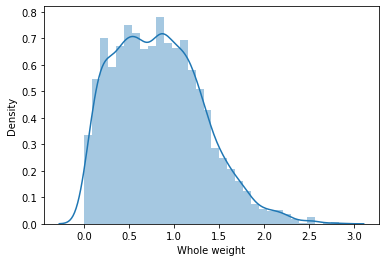

In [3]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.distplot(df['Whole weight'])

(ii)BIVARIATE ANALYSIS

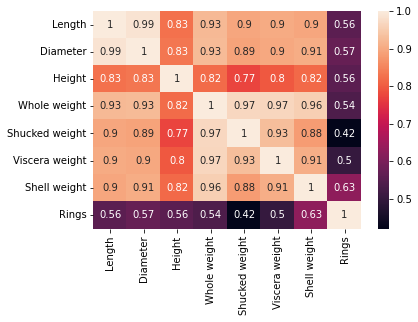

In [4]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True)
plt.show()

(iii)MULTIVARIATE ANALYSIS

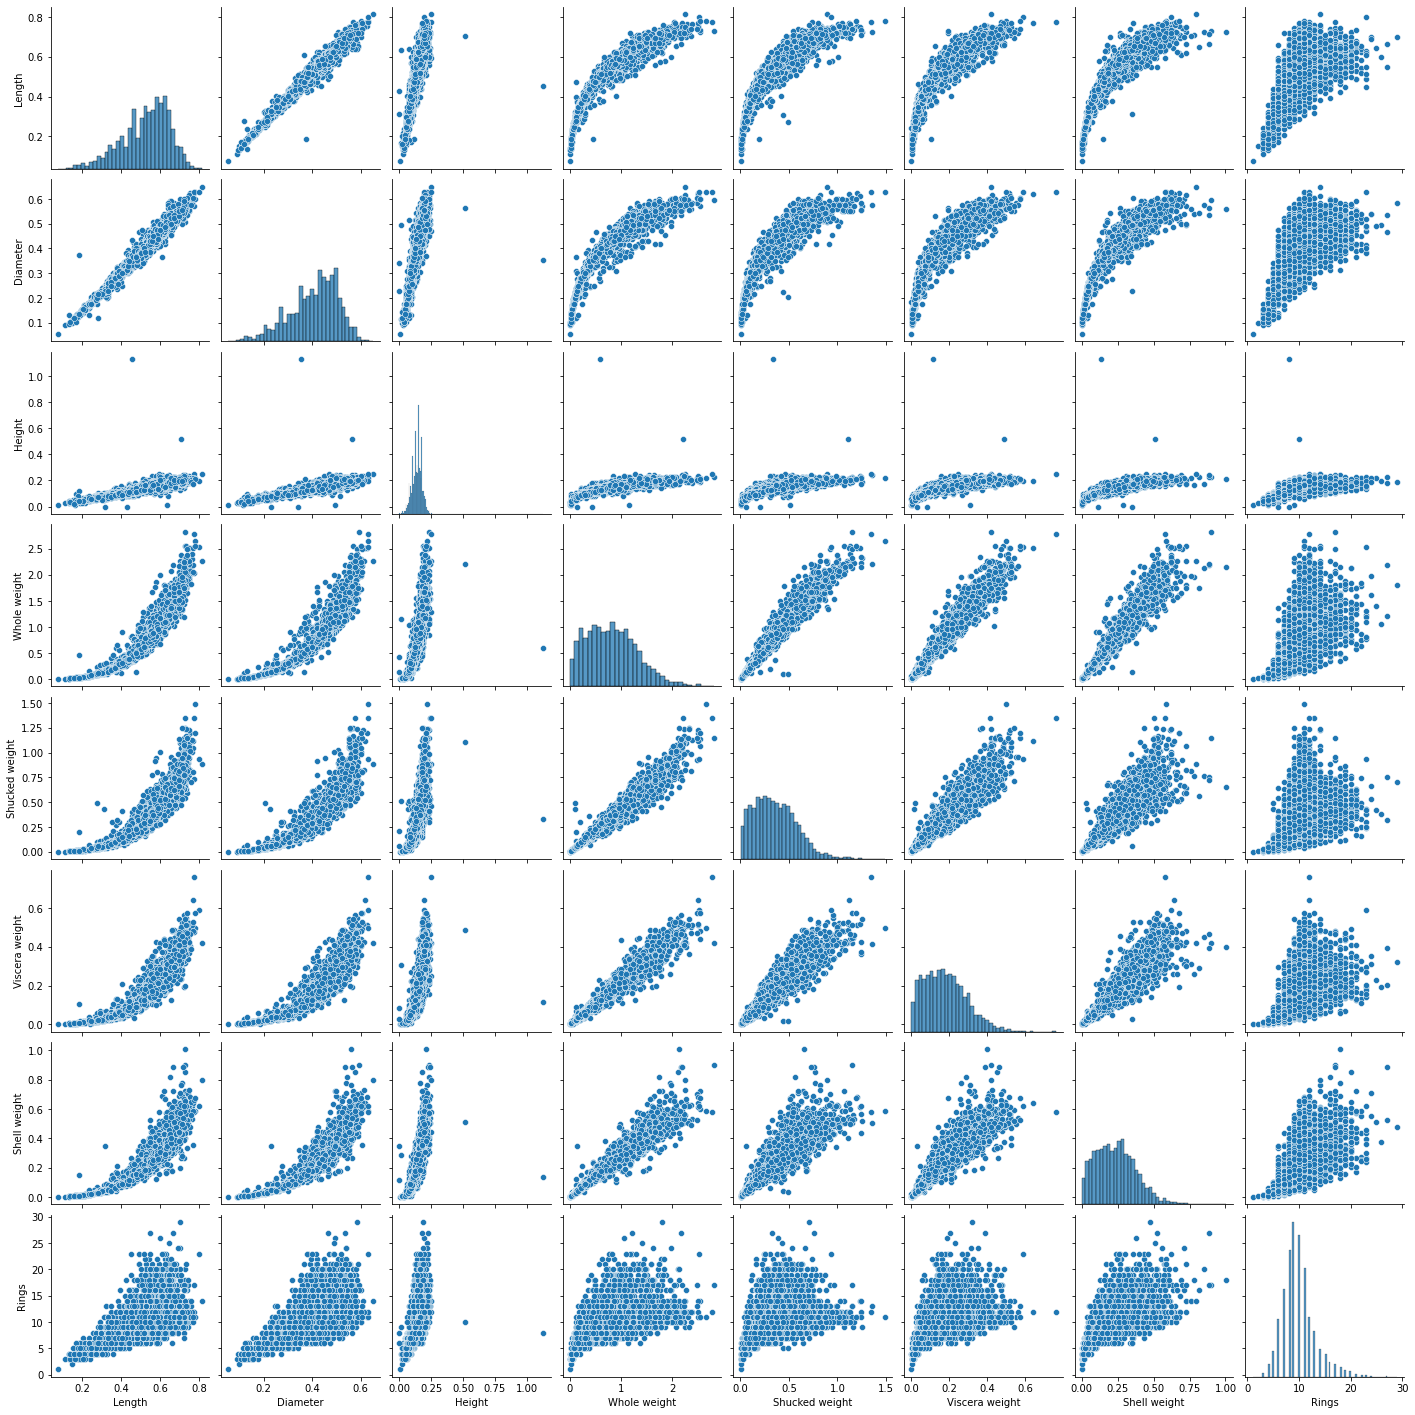

In [5]:
sns.pairplot(df)
plt.show()

4.PERFOMING DESCRIPTIVE STATISTICS ON THE DATASET

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


5.CHECKING FOR MISSING VALUES AND DEALING WITH THEM

In [7]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

6.FINDING THE OUTLIERS AND REPLACING THEM

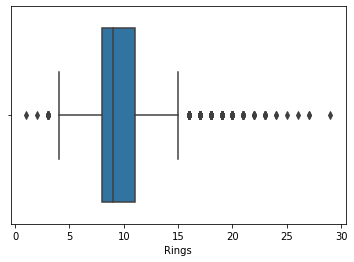

In [12]:
sns.boxplot(x='Rings',data=df)

In [13]:
Q1=df.Rings.quantile(0.25)
Q2=df.Rings.quantile(0.75)
IQR=Q2-Q1
print(IQR)

3.0


In [14]:
A=df[~((df.Rings<(Q1-6.0*IQR))|(df.Rings>(Q2+6.0*IQR)))]
print(A)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

7.CHECKING FOR CATEGORICAL COLUMNS AND PERFORMING ENCODING

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0])],remainder='passthrough')
y=ct.fit_transform(df)
z=pd.DataFrame(y)
print(z)

       0    1    2      3      4      5       6       7       8       9     10
0     0.0  0.0  1.0  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15.0
1     0.0  0.0  1.0  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7.0
2     1.0  0.0  0.0  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9.0
3     0.0  0.0  1.0  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10.0
4     0.0  1.0  0.0  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7.0
...   ...  ...  ...    ...    ...    ...     ...     ...     ...     ...   ...
4172  1.0  0.0  0.0  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11.0
4173  0.0  0.0  1.0  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10.0
4174  0.0  0.0  1.0  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9.0
4175  1.0  0.0  0.0  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10.0
4176  0.0  0.0  1.0  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12.0

[4177 rows x 11 columns]


8.SPLITTING THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES 

In [34]:
dependent=df.iloc[0:,4:8].values
print(dependent)

[[0.514  0.2245 0.101  0.15  ]
 [0.2255 0.0995 0.0485 0.07  ]
 [0.677  0.2565 0.1415 0.21  ]
 ...
 [1.176  0.5255 0.2875 0.308 ]
 [1.0945 0.531  0.261  0.296 ]
 [1.9485 0.9455 0.3765 0.495 ]]


In [30]:
independent=df.iloc[0:,0:4].values
print(independent)

[['M' 0.455 0.365 0.095]
 ['M' 0.35 0.265 0.09]
 ['F' 0.53 0.42 0.135]
 ...
 ['M' 0.6 0.475 0.205]
 ['F' 0.625 0.485 0.15]
 ['M' 0.71 0.555 0.195]]


9.SCALING THE INDEPENDENT VARIABLES

In [26]:
s=df.iloc[:,0:4]
print(s)

     Sex  Length  Diameter  Height
0      M   0.455     0.365   0.095
1      M   0.350     0.265   0.090
2      F   0.530     0.420   0.135
3      M   0.440     0.365   0.125
4      I   0.330     0.255   0.080
...   ..     ...       ...     ...
4172   F   0.565     0.450   0.165
4173   M   0.590     0.440   0.135
4174   M   0.600     0.475   0.205
4175   F   0.625     0.485   0.150
4176   M   0.710     0.555   0.195

[4177 rows x 4 columns]


10.SPLITTING THE DATA INTO TRAINING AND TESTING

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dependent,independent,test_size=0.4,random_state=0)
print("x_train")
print(x_train)
print("x_test")
print(x_test)
print("y_train")
print(y_train)
print("y_test")
print(y_test)


x_train
[[0.106  0.054  0.02   0.028 ]
 [0.4475 0.2165 0.126  0.11  ]
 [1.1745 0.5255 0.273  0.339 ]
 ...
 [0.959  0.463  0.2065 0.2535]
 [1.127  0.477  0.2365 0.3185]
 [0.326  0.1325 0.075  0.101 ]]
x_test
[[0.9175 0.2775 0.243  0.335 ]
 [0.616  0.261  0.143  0.1935]
 [1.2555 0.527  0.374  0.3175]
 ...
 [0.939  0.3385 0.201  0.32  ]
 [0.7955 0.405  0.167  0.204 ]
 [0.163  0.0745 0.033  0.048 ]]
y_train
[['I' 0.275 0.195 0.065]
 ['M' 0.45 0.335 0.125]
 ['M' 0.63 0.49 0.17]
 ...
 ['M' 0.595 0.45 0.145]
 ['F' 0.625 0.49 0.165]
 ['I' 0.41 0.325 0.11]]
y_test
[['M' 0.55 0.425 0.155]
 ['I' 0.5 0.4 0.12]
 ['M' 0.62 0.48 0.155]
 ...
 ['I' 0.605 0.47 0.14]
 ['M' 0.58 0.455 0.135]
 ['I' 0.33 0.24 0.075]]


11.BUILDING THE MODEL

Text(0.5, 1.0, 'Rings Vs Diameter Vs Sex')

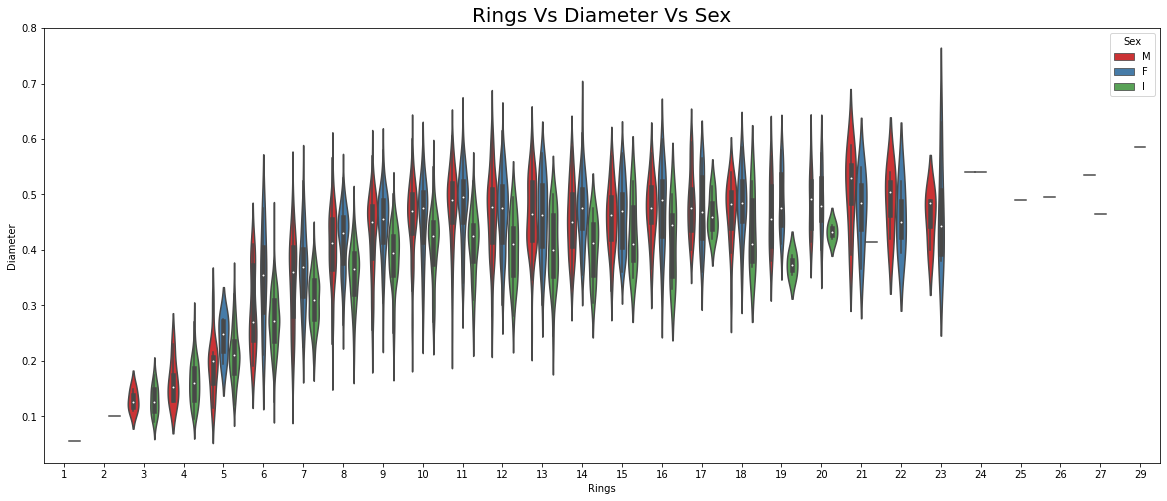

In [40]:
plt.rcParams['figure.figsize']=(20,8)
sns.violinplot(df['Rings'],df['Diameter'],hue=df['Sex'],palette='Set1')
plt.title('Rings Vs Diameter Vs Sex',fontsize=20)

Text(0.5, 1.0, 'Rings Vs Whole weight')

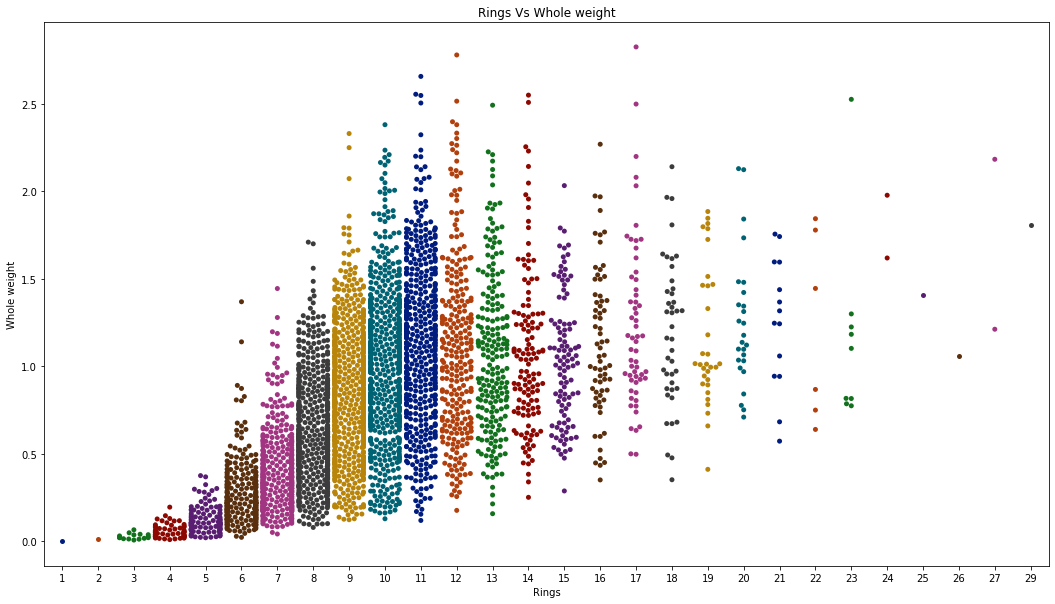

In [41]:
plt.rcParams['figure.figsize']=(18,10)
sns.swarmplot(df['Rings'],df['Whole weight'],palette='dark')
plt.title('Rings Vs Whole weight')

12.TRAINING THE MODEL

In [43]:
print("Shape of x_train:",x_train.shape)
print("Shape of y_train:",y_train.shape)

Shape of x_train: (2506, 4)
Shape of y_train: (2506, 4)


13.TESTING THE MODEL

In [44]:
print("Shape of x_test:",x_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_test: (1671, 4)
Shape of y_test: (1671, 4)


14.MEASURING THE PERFOMANCE USING METRICS

In [71]:
lm=linear_model.LinearRegression()
Rings=pd.DataFrame(df['Rings'])
Length=pd.DataFrame(df['Length'])
model=lm.fit(Rings,Length)
print("Model coef:",model.coef_)
#model.coef_
print("Model intercept:",model.intercept_)
#model.intercept_
M=model.score(Rings,Length)
print("Model score:",M)

Model coef: [[0.02073653]]
Model intercept: [0.31800196]
Model score: 0.3099366873366929
